##  Initial notebook to analyse different ETF's

#### Will look at importing ETF data and doing initioal analysis like sector, country percentage make up


In [1]:
# import required packages
import pandas as pd
import numpy as np
import requests
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = r'/home/roddyb/R_Baker_Stock_Research/data/interim/FUEL_Portfolio_Holdings.csv'


In [3]:
df = pd.read_csv(path, skiprows=6, skipfooter = 25, engine = 'python')

In [4]:
df.head()

,Ticker,SEDOL,Name,Asset Class,Sector,Country,Currency,Weight (%),Shares/Units (#),Market Value (AUD),Notional Value (AUD)
0,SHEL LN,BP6MXD8,SHELL PLC,Equities,Energy,Netherlands,GBP,0.103069,868375,33182702.20,33182702.20
1,XOM UN,2326618,EXXON MOBIL CORP,Equities,Energy,United States,USD,0.086108,254507,27722262.55,27722262.55
2,CVX UN,2838555,CHEVRON CORP,Equities,Energy,United States,USD,0.078253,134932,25193059.36,25193059.36
3,TTE FP,B15C557,TOTALENERGIES SE,Equities,Energy,France,EUR,0.072043,285254,23193802.47,23193802.47
4,COP UN,2685717,CONOCOPHILLIPS,Equities,Energy,United States,USD,0.063076,161920,20306969.55,20306969.55


<AxesSubplot:ylabel='Ticker'>

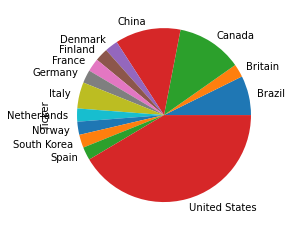

In [5]:
# plot make up of country

df.iloc[:41,[0,2,4,5,7]].groupby('Country')['Ticker'].count().plot.pie()

In [18]:
# filter by country
china = df['Country'].isin(['United States'])
df[china]

,Ticker,SEDOL,Name,Asset Class,Sector,Country,Currency,Weight (%),Shares/Units (#),Market Value (AUD),Notional Value (AUD)
1,XOM UN,2326618,EXXON MOBIL CORP,Equities,Energy,United States,USD,0.086108,254507,2.772226e+07,2.772226e+07
2,CVX UN,2838555,CHEVRON CORP,Equities,Energy,United States,USD,0.078253,134932,2.519306e+07,2.519306e+07
4,COP UN,2685717,CONOCOPHILLIPS,Equities,Energy,United States,USD,0.063076,161920,2.030697e+07,2.030697e+07
7,SLB UN,2779201,SCHLUMBERGER NV,Equities,Energy,United States,USD,0.032802,182206,1.056050e+07,1.056050e+07
8,EOG UN,2318024,EOG RESOURCES INC,Equities,Energy,United States,USD,0.029347,60804,9.448162e+06,9.448162e+06
10,PXD UN,2690830,PIONEER NATURAL RESOURCES CO,Equities,Energy,United States,USD,0.028945,30128,9.318612e+06,9.318612e+06
12,MPC UN,B3K3L40,MARATHON PETROLEUM CORP,Equities,Energy,United States,USD,0.025338,75169,8.157503e+06,8.157503e+06
14,PSX UN,B78C4Y8,PHILLIPS 66,Equities,Energy,United States,USD,0.021700,56911,6.986294e+06,6.986294e+06
16,OXY UN,2655408,OCCIDENTAL PETROLEUM CORP,Equities,Energy,United States,USD,0.020773,121327,6.687913e+06,6.687913e+06
17,WMB UN,2967181,WILLIAMS COS INC/THE,Equities,Energy,United States,USD,0.019431,149944,6.255831e+06,6.255831e+06


In [22]:
# use yfinance to get stock specific data

stock_info = yf.Ticker('TTE.PA').info
# stock_info.keys() for other properties you can explore
market_price = stock_info['regularMarketPrice']
previous_close_price = stock_info['regularMarketPreviousClose']
print('market price ', market_price)
print('previous close price ', previous_close_price)

market price  45.59
previous close price  45.7


In [15]:
# different metrics from yahoo finance
stock_info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'address2', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskR

In [23]:
#example of different metrics
stock_info['longBusinessSummary']

"TotalEnergies SE operates as an integrated oil and gas company worldwide. The company operates through four segments: Exploration & Production; Integrated Gas, Renewables & Power; Refining & Chemicals; and Marketing & Services. The company's Exploration & Production segment is involved in oil and natural gas exploration and production activities in approximately 50 countries. Its Integrated Gas, Renewables & Power segment engages in the liquefied natural gas (LNG) production, shipping, trading, and regasification activities; trading of liquefied petroleum gas (LPG), petcoke and sulfur, natural gas, and electricity; transportation of natural gas; electricity production from natural gas, wind, solar, hydroelectric, and biogas sources; energy storage activities; and development and operation of biomethane production units, as well as provides energy efficiency services. The company's Refining & Chemicals segment is involved in refining petrochemicals, including olefins and aromatics; and

In [24]:
# example of marketcap in billions of dollars
stock_info['marketCap']/10**9

118.372614144